# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_df = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
total_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [53]:
# Checking the number of mice.
total_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [54]:
# Our data should be uniquely identified by Mouse ID and Timepoint
index_total_df = total_df.set_index('Mouse ID')
#index_total_df
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = total_df[['Mouse ID','Timepoint']].duplicated(keep = False)
total_df[duplicate]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [55]:
# Optional: Get all the data for the duplicate mouse ID. 
#index_total_df.loc['g989']

In [56]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_df = total_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [57]:
# Checking the number of mice in the clean DataFrame.
clean_total_df.shape

(1888, 8)

## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_total_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_volume_median = tumor['Tumor Volume (mm3)'].median()
tumor_volume_variance = tumor['Tumor Volume (mm3)'].var()
tumor_volume_standard = tumor['Tumor Volume (mm3)'].std()
tumor_volume_sem = tumor['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

total_tumor_volume_df = pd.DataFrame({'Mean': tumor_volume_mean, 'Median': tumor_volume_median, 'Variance': tumor_volume_variance, 'Standard Deviation': tumor_volume_standard,'SEM': tumor_volume_sem})
total_tumor_volume_df
                    

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [60]:
counts = clean_total_df.value_counts('Drug Regimen')
counts.index.values
counts.values


array([230, 228, 188, 186, 182, 181, 181, 178, 178, 156])

Text(0.5, 1.0, 'Mouse ID/Timepoints')

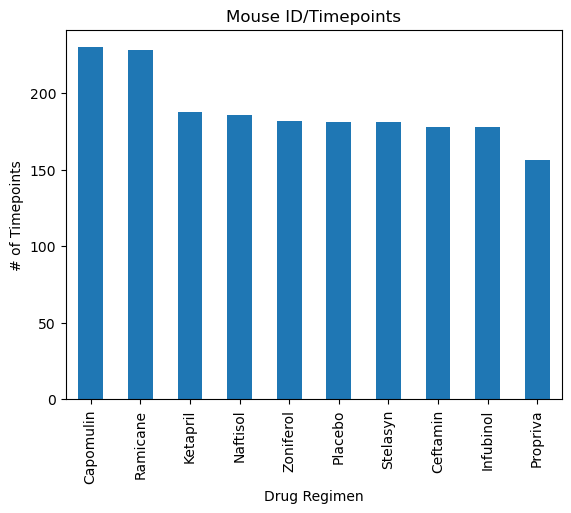

In [61]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts.plot(kind = "bar")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.xticks(rotation = 90)
plt.title('Mouse ID/Timepoints')

Text(0.5, 1.0, 'Mouse ID/Timepoints')

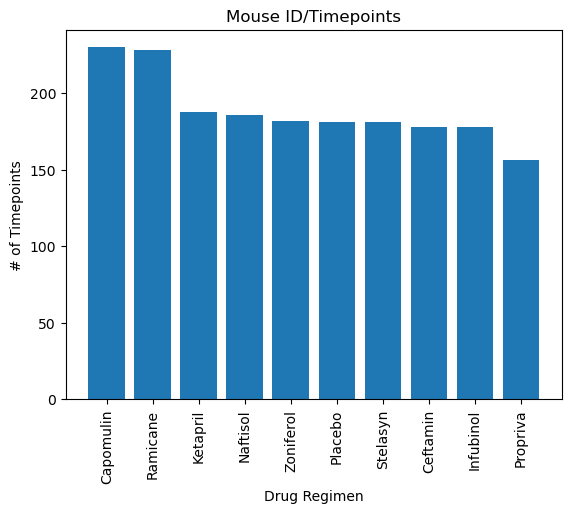

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values, counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Timepoints')
plt.xticks(rotation = 90)
plt.title('Mouse ID/Timepoints')

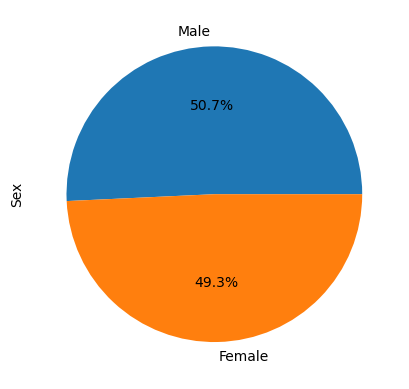

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_total_df.Sex.value_counts()
# counts.plot(kind="pie",autopct='%1.1f%%')
counts.plot.pie(autopct='%1.1f%%')
plt.show()

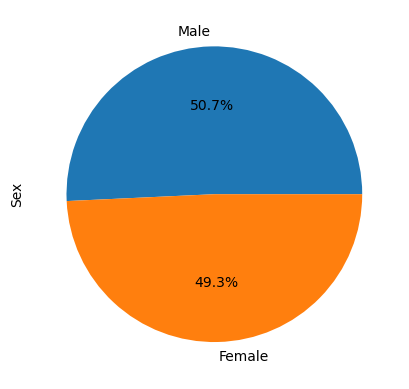

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_total_df.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

In [65]:
tumor_late = clean_total_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_late

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

## Quartiles, Outliers and Boxplots

In [66]:
tumor_late = tumor_late.reset_index()
tumor_late

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumor_late = clean_total_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_late = tumor_late.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = tumor_late.merge(clean_total_df,on=['Mouse ID','Timepoint'],how="left")

merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [68]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_data_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    #print(quartiles)
    #break
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [69]:
df = merged_data.loc[merged_data["Drug Regimen"] == "Infobinol", 'Tumor Volume (mm3)']
df

Series([], Name: Tumor Volume (mm3), dtype: float64)

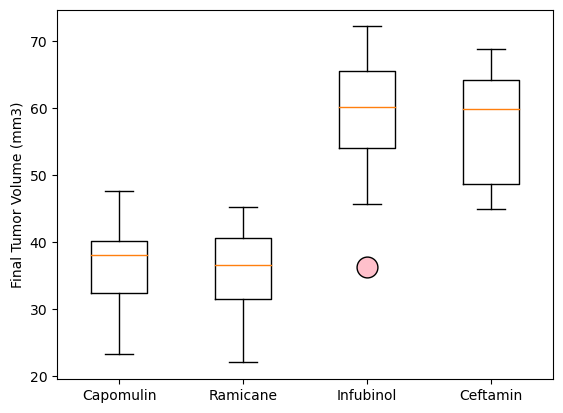

In [70]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
orange_out = dict(markerfacecolor='pink',markersize=15)
plt.boxplot(tumor_data_list, labels = treatment_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

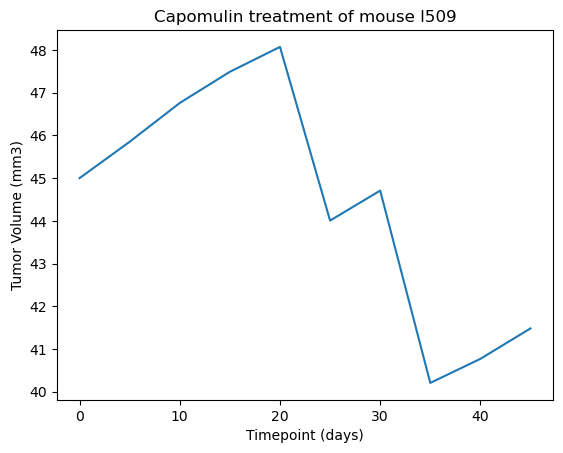

In [71]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_total_df.loc[clean_total_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [72]:
capomulin_table = clean_total_df.loc[clean_total_df['Drug Regimen'] == "Capomulin"]
capomulin_table

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


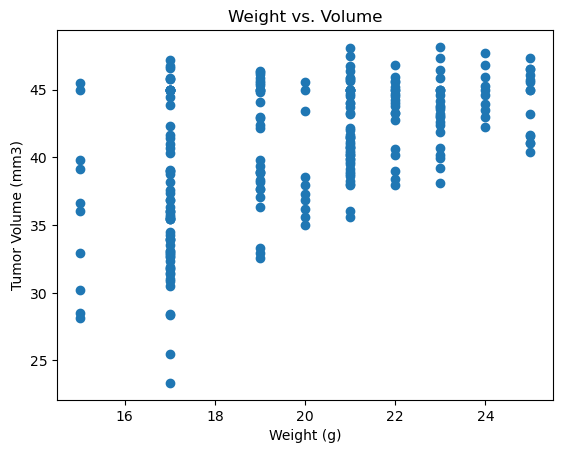

In [73]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_table['Weight (g)'], capomulin_table['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Weight vs. Volume')
plt.show()

## Correlation and Regression

In [74]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [75]:
capomulin_table.corr()

/var/folders/2p/6jf7x5b55_31735qv_2xkh540000gn/T/ipykernel_5564/667701295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  capomulin_table.corr()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Age_months,1.000000,-0.169172,-0.057964,-0.021604,0.006748
Weight (g),-0.169172,1.000000,-0.035271,0.525700,-0.119149
Timepoint,-0.057964,-0.035271,1.000000,-0.584271,0.584006
Tumor Volume (mm3),-0.021604,0.525700,-0.584271,1.000000,-0.313092
Metastatic Sites,0.006748,-0.119149,0.584006,-0.313092,1.000000


In [83]:
x = np.array(['Weight (g)'])
y = np.array(['Tumor Volume (mm3)'])
linearreg = linregress(x, y)
x = x.reshape(0, 50)
linearreg.fit(x, y)
y_pred = linearreg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='green')
plt.show()

UFuncTypeError: ufunc 'maximum' did not contain a loop with signature matching types (dtype('<U10'), dtype('<U10')) -> None